📌 Counting FULL dataset images...

Found 9714 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 200 images belonging to 5 classes.

🔢 FULL DATASET:
Train images: 9714
Test images: 100
Validation images: 200

📌 Loading ONLY 10% of dataset for FAST training...

Found 972 images belonging to 5 classes.
Found 8742 images belonging to 5 classes.

🔵 Training WITHOUT augmentation...



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 135s 25s/step - accuracy: 0.1797 - loss: 4.3173 - val_accuracy: 0.2250 - val_loss: 1.6299
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 67s 17s/step - accuracy: 0.1945 - loss: 1.6404 - val_accuracy: 0.2812 - val_loss: 1.6055
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 12s/step - accuracy: 0.2587 - loss: 1.5545 - val_accuracy: 0.2375 - val_loss: 1.6473
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - accuracy: 0.3159 - loss: 1.4892 - val_accuracy: 0.3313 - val_loss: 1.5438
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 51s 13s/step - accuracy: 0.4824 - loss: 1.4540 - val_accuracy: 0.3250 - val_loss: 1.5746
Found 972 images belonging to 5 classes.
Found 8742 images belonging to 5 classes.

🟢 Training WITH augmentation...

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 14s/step - accuracy: 0.2061 - loss: 2.7697 - val_accuracy: 0.2125 - val_loss: 1.6001
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.2136 - loss: 1.6102 - val_accuracy: 0.2000 - val_loss: 1.6079
Epoch 3/5
5/5 

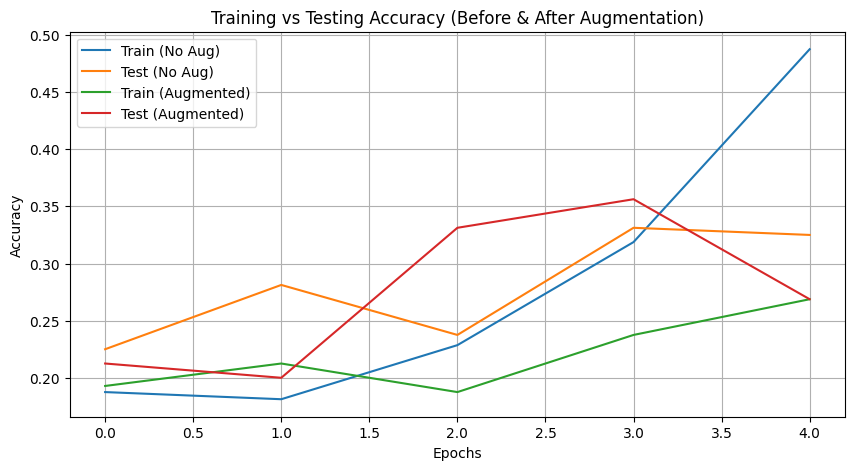

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

DATASET_PATH = "/content/drive/MyDrive/archive (1)/Fruits Classification"   # <-- change this to your folder

# -------------------------------------------------------
# 1. SHOW FULL DATASET COUNTS (train / test / val)
# -------------------------------------------------------
print("📌 Counting FULL dataset images...\n")

full_datagen = ImageDataGenerator(rescale=1./255)

full_train = full_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

full_test = full_datagen.flow_from_directory(
    DATASET_PATH + "/test",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

full_val = full_datagen.flow_from_directory(
    DATASET_PATH + "/valid",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print("\n🔢 FULL DATASET:")
print("Train images:", full_train.samples)
print("Test images:", full_test.samples)
print("Validation images:", full_val.samples)

# -------------------------------------------------------
# 2. LOAD ONLY 10% SUBSET FOR FAST TRAINING
# -------------------------------------------------------
print("\n📌 Loading ONLY 10% of dataset for FAST training...\n")

subset_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.90     # only 10% for training
)

train_small = subset_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_small = subset_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# -------------------------------------------------------
# 3. SIMPLE CNN MODEL
# -------------------------------------------------------
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dense(train_small.num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# -------------------------------------------------------
# 4. TRAIN BEFORE AUGMENTATION
# -------------------------------------------------------
print("\n🔵 Training WITHOUT augmentation...\n")

model1 = create_model()

history1 = model1.fit(
    train_small,
    epochs=5,
    validation_data=val_small,
    steps_per_epoch=5,     # only few batches for speed
    validation_steps=5
)

# -------------------------------------------------------
# 5. TRAIN AFTER AUGMENTATION
# -------------------------------------------------------
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.90,
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_aug = aug_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_aug = aug_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("\n🟢 Training WITH augmentation...\n")

model2 = create_model()

history2 = model2.fit(
    train_aug,
    epochs=5,
    validation_data=val_aug,
    steps_per_epoch=5,
    validation_steps=5
)

# -------------------------------------------------------
# 6. PLOT ACCURACY COMPARISON
# -------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(history1.history['accuracy'], label="Train (No Aug)")
plt.plot(history1.history['val_accuracy'], label="Test (No Aug)")
plt.plot(history2.history['accuracy'], label="Train (Augmented)")
plt.plot(history2.history['val_accuracy'], label="Test (Augmented)")
plt.title("Training vs Testing Accuracy (Before & After Augmentation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


1) Loading full dataset generators (for counts & test evaluation)...

Found 9714 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 100 images belonging to 5 classes.

2) FULL DATASET COUNTS:
   Train images (full):       9714
   Validation images (full):  200
   Test images (full):        100

3) Plotting sample images (from full train)...


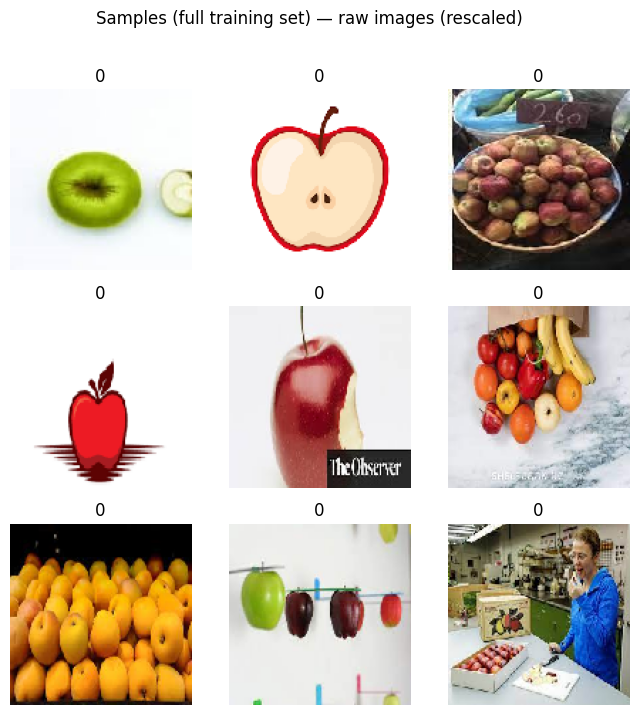


4) Creating subset generators (use only 10% for 'training' subset)...
Found 972 images belonging to 5 classes.
Found 8742 images belonging to 5 classes.

Subset (small) counts used for fast training:
   train_small.samples: 972
   val_small.samples:   8742
Found 972 images belonging to 5 classes.
Found 8742 images belonging to 5 classes.

After augmentation (generator) counts:
   train_aug.samples: 972
   val_aug.samples:   8742

Plotting a few augmented images (single batch from train_aug)...


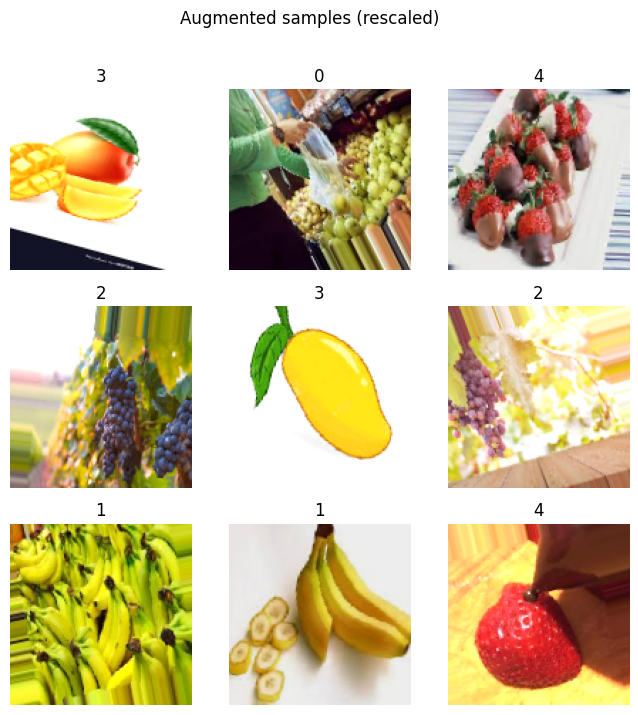


Number of classes detected: 5

5) Training model WITHOUT augmentation (fast subset)...
Epoch 1/5
5/5 - 8s - 2s/step - accuracy: 0.2062 - loss: 1.9477 - val_accuracy: 0.0000e+00 - val_loss: 1.7594
Epoch 2/5
5/5 - 1s - 276ms/step - accuracy: 0.2188 - loss: 1.6081 - val_accuracy: 1.0000 - val_loss: 1.4506
Epoch 3/5
5/5 - 3s - 546ms/step - accuracy: 0.1875 - loss: 1.6025 - val_accuracy: 0.0000e+00 - val_loss: 1.6265
Epoch 4/5
5/5 - 3s - 600ms/step - accuracy: 0.2714 - loss: 1.5846 - val_accuracy: 0.0000e+00 - val_loss: 1.6625
Epoch 5/5
5/5 - 2s - 407ms/step - accuracy: 0.3063 - loss: 1.5452 - val_accuracy: 0.3125 - val_loss: 1.4575

Evaluating model WITHOUT augmentation on FULL test set...
4/4 - 16s - 4s/step - accuracy: 0.3000 - loss: 1.5020
Test accuracy (NO AUG): 0.3000

6) Training model WITH augmentation (fast subset from train_aug & val_aug)...
Epoch 1/5
5/5 - 10s - 2s/step - accuracy: 0.1786 - loss: 2.1888 - val_accuracy: 1.0000 - val_loss: 1.4941
Epoch 2/5
5/5 - 3s - 694ms/step - 

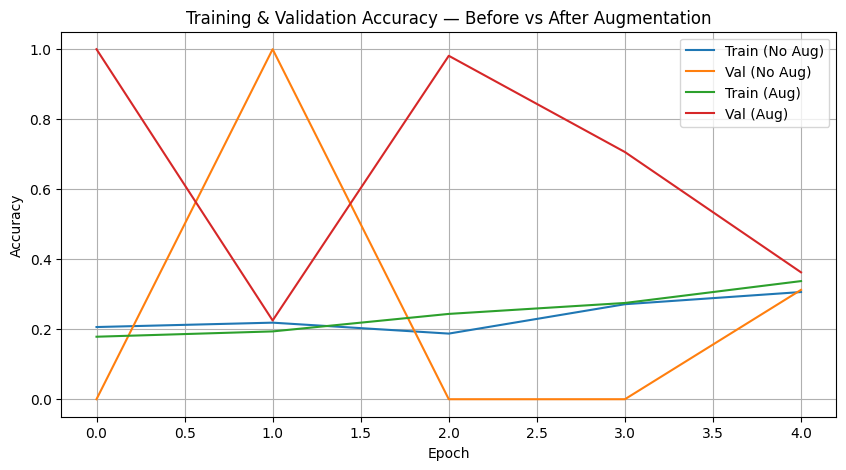


Comparison summary:
  Train acc - NoAug: 0.3063 | Aug: 0.3375
  Val   acc - NoAug: 0.3125 | Aug: 0.3625
  Test  acc - NoAug: 0.3000 | Aug: 0.4500


In [4]:
# Full end-to-end script — fast-run uses a small subset for training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# -------------------------
# User settings
# -------------------------
DATASET_PATH = "/content/drive/MyDrive/archive (1)/Fruits Classification"  # <-- set your path
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 5            # small for quick runs
STEPS_PER_EPOCH = 5   # train only a few batches per epoch to be fast
VALIDATION_STEPS = 5

# -------------------------
# h. Load the dataset (full generators used only to count and evaluate)
# -------------------------
print("1) Loading full dataset generators (for counts & test evaluation)...\n")
full_datagen = ImageDataGenerator(rescale=1./255)

full_train = full_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

full_valid = full_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "valid"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

full_test = full_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# -------------------------
# i. Show the no. of testing and training images (full counts)
# -------------------------
print("\n2) FULL DATASET COUNTS:")
print("   Train images (full):      ", full_train.samples)
print("   Validation images (full): ", full_valid.samples)
print("   Test images (full):       ", full_test.samples)

# -------------------------
# j. Plot some images (from full_train)
# -------------------------
print("\n3) Plotting sample images (from full train)...")
x_batch, y_batch = next(full_train)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis('off')
plt.suptitle("Samples (full training set) — raw images (rescaled)")
plt.show()

# -------------------------
# 2) Prepare small-subset generators for fast training (Method 1)
#    We show the full counts above, but use a small fraction for training:
# -------------------------
print("\n4) Creating subset generators (use only 10% for 'training' subset)...")
subset_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.90  # keep 90% aside -> use ~10% as 'training' subset for fast runs
)

# small training subset (from train folder)
train_small = subset_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42
)

val_small = subset_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=42
)

print("\nSubset (small) counts used for fast training:")
print("   train_small.samples:", train_small.samples)
print("   val_small.samples:  ", val_small.samples)

# -------------------------
# k. Image augmentation: rotation, flipping, contrast, brightness
#    We'll create an augmented generator (ImageDataGenerator covers rotation/flip/brightness/zoom).
#    For contrast we add a RandomContrast preprocessing layer in the augmented model.
# -------------------------
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.90,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

train_aug = aug_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42
)

val_aug = aug_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=42
)

print("\nAfter augmentation (generator) counts:")
print("   train_aug.samples:", train_aug.samples)
print("   val_aug.samples:  ", val_aug.samples)

# plot a few augmented images (draw a batch)
print("\nPlotting a few augmented images (single batch from train_aug)...")
aug_images, aug_labels = next(train_aug)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(aug_images[i])
    plt.title(np.argmax(aug_labels[i]))
    plt.axis('off')
plt.suptitle("Augmented samples (rescaled)")
plt.show()

# -------------------------
# Define model builder. We'll optionally include a RandomContrast layer for augmented model.
# -------------------------
def create_cnn_model(num_classes, include_contrast_layer=False):
    inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = inputs
    if include_contrast_layer:
        # RandomContrast will only affect training and simulates contrast augmentation
        x = layers.RandomContrast(0.2)(x)
    x = layers.Conv2D(32, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = train_small.num_classes
print(f"\nNumber of classes detected: {num_classes}")

# -------------------------
# n. Train model WITHOUT augmentation (uses train_small & val_small)
# -------------------------
print("\n5) Training model WITHOUT augmentation (fast subset)...")
model_noaug = create_cnn_model(num_classes, include_contrast_layer=False)
history_noaug = model_noaug.fit(
    train_small,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_small,
    validation_steps=VALIDATION_STEPS,
    verbose=2
)

# Evaluate this model on the FULL test set for realistic test accuracy
print("\nEvaluating model WITHOUT augmentation on FULL test set...")
test_loss_noaug, test_acc_noaug = model_noaug.evaluate(full_test, verbose=2)
print(f"Test accuracy (NO AUG): {test_acc_noaug:.4f}")

# -------------------------
# p. Train model WITH augmentation
#    We'll include RandomContrast layer to handle contrast augmentation too.
# -------------------------
print("\n6) Training model WITH augmentation (fast subset from train_aug & val_aug)...")
model_aug = create_cnn_model(num_classes, include_contrast_layer=True)
history_aug = model_aug.fit(
    train_aug,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_aug,
    validation_steps=VALIDATION_STEPS,
    verbose=2
)

# Evaluate this model on the FULL test set
print("\nEvaluating model WITH augmentation on FULL test set...")
# Reset full_test iterator first
full_test.reset()
test_loss_aug, test_acc_aug = model_aug.evaluate(full_test, verbose=2)
print(f"Test accuracy (AUG): {test_acc_aug:.4f}")

# -------------------------
# o/q. Show training & testing accuracy (print final epoch values)
# -------------------------
train_acc_noaug = history_noaug.history['accuracy'][-1]
val_acc_noaug = history_noaug.history['val_accuracy'][-1]

train_acc_aug = history_aug.history['accuracy'][-1]
val_acc_aug = history_aug.history['val_accuracy'][-1]

print("\n--- Final accuracies (last epoch) ---")
print(f"No Augmentation - Train acc: {train_acc_noaug:.4f}, Val acc: {val_acc_noaug:.4f}, Test acc: {test_acc_noaug:.4f}")
print(f"With Augmentation - Train acc: {train_acc_aug:.4f}, Val acc: {val_acc_aug:.4f}, Test acc: {test_acc_aug:.4f}")

# -------------------------
# r. Compare before & after augmentation — plot curves together & print numeric comparison
# -------------------------
plt.figure(figsize=(10,5))
# no-aug
plt.plot(history_noaug.history['accuracy'], label='Train (No Aug)')
plt.plot(history_noaug.history['val_accuracy'], label='Val (No Aug)')
# aug
plt.plot(history_aug.history['accuracy'], label='Train (Aug)')
plt.plot(history_aug.history['val_accuracy'], label='Val (Aug)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy — Before vs After Augmentation')
plt.legend()
plt.grid()
plt.show()

print("\nComparison summary:")
print(f"  Train acc - NoAug: {train_acc_noaug:.4f} | Aug: {train_acc_aug:.4f}")
print(f"  Val   acc - NoAug: {val_acc_noaug:.4f} | Aug: {val_acc_aug:.4f}")
print(f"  Test  acc - NoAug: {test_acc_noaug:.4f} | Aug: {test_acc_aug:.4f}")

# -------------------------
# Notes for you:
# - All images are normalized with rescale=1./255 (m. Normalizing).
# - Augmentation uses rotation, flip, brightness in the generator and RandomContrast in the model.
# - We used a small subset (validation_split=0.90 and steps_per_epoch small) so training is fast.
# - For final/full training remove the 'validation_split=0.90' or set it lower, increase steps_per_epoch and EPOCHS.
# -------------------------
